In [1]:
import numpy as np
import pandas as pd
import os
import math 
import random 
import shutil #to move files from one folder to another
from PIL import Image #to read the Image
from skimage.io import imread
from skimage.metrics import structural_similarity as ssim #for SSIM
from skimage.color import rgb2gray #to convert RGB images to Grayscale images

import matplotlib.pyplot as plt


In [2]:
path=r'C:\Users\Biswarup Mistry\Desktop\New_DB\TrainingSet' #--------------------[Change Here]
#path=r'C:\Users\Biswarup Mistry\Desktop\USC_SIPI_Databases' #USC_SIPI_Database directory [To Change 1]
dir_list=os.listdir(path)
print(len(dir_list))

90


In [3]:
def createFolder():
    count=0
    count1=0
    dir_list=os.listdir(path)
    parent_dir=path
    dir_list=os.listdir(path)
    check1=str(path+'\\'+'256')
    check2=str(path+'\\'+'512')
    check3=str(path+'\\'+'1024')
    
    isExist1=os.path.exists(check1)
    isExist2=os.path.exists(check2)
    isExist3=os.path.exists(check3)
    
    if isExist1==isExist2==isExist3==False:
        for item in dir_list:
            if (item!=check1) and (item!=check2) and (item!=check3):
                k=str(path+'\\'+item)
                img = Image.open(k)
                w, h= img.size
                img.close()
                file_path=str(path+'\\'+str(w))
                isExist=os.path.exists(file_path)
                if isExist==False:
                    directory=str(w)
                    path1 = os.path.join(parent_dir, directory)
                    os.mkdir(path1)
                    count1+=1
    else:
        print('Folders already exist!')
    print('Created Folder : ',count1)
    

In [4]:
#moving images according to their image size to appropriate folders

def moveImage():
    count=0
    dir_list=os.listdir(path)
    check1=str(path+'\\'+'256')
    check2=str(path+'\\'+'512')
    check3=str(path+'\\'+'1024')
    #print(len(dir_list))
    if len(dir_list)>3:
        for item in dir_list:
            k=str(path+'\\'+item) 
            isdir = os.path.isdir(k)
            if isdir== False :
                img = Image.open(k)
                w, h= img.size
                file_path=str(path+'\\'+str(w))
                old_path=str(path+'\\'+str(item))
                n_path=str(file_path+'\\'+str(item))
                img.close()
                shutil.move(old_path, n_path)
                count+=1
        
        print('Image(s) moved : ',count)
    elif len(dir_list)==3:
        print('Nothing to Move!')


In [5]:
createFolder()

Created Folder :  3


In [6]:
moveImage()

Image(s) moved :  90


In [7]:
def get_Noise(image, prob):
    #'''
    #Add salt and pepper noise to image
    #prob: Probability of the noise
    #'''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

In [8]:
def PSNRVsNoiseDensity(dirc_list,dataframe,D): #getting corresponding mse(s) for given noise density 'd'
    r=255.0
    #dataframe = pd.DataFrame()
    file_path=str(dirc_list+'\\'+'PSNRvsNoiseDensity.csv')
    isExist=os.path.exists(file_path)
    if isExist==False:
        for item in os.listdir(dirc_list) :
            if item!='SSIMvsNoiseDensity.csv' and item!='PSNRvsNoiseDensity.csv':
                #k=str(path+str(item))
                k=str(dirc_list+'\\'+item)
                img = imread(k)
                x=[]
                y=[]
                df=np.array([])
                #i=iteration
                #d=0.1
                #while(i>0 and d<=0.3):
                #D=[0.1,0.2,0.3,0.4,0.5]
                for d in D:
                    noise_img=get_Noise(img,d) #getting noisy image
                    mse=np.square(np.subtract(img,noise_img)).mean() #calculating MSE of Original image and Image with Noise
                    psnr=10*np.log10(np.square(r)/mse) #getting the psnr of Original image and Noisy image
                    x.append(d)
                    y.append(psnr)
                    df=np.append(df,psnr)
                    #d=d+0.1
                    #i=i-1
                dataframe[item] = df
            dataframe.to_csv(os.path.join(dirc_list,'PSNRvsNoiseDensity.csv'))# index=False) #creating the PSNR valu csv file
            #os.path.join(dirc_list,'PSNRvsNoiseDensity.csv')
        

In [9]:
def SSIMVsNoiseDensity(dirc_list,dataframe,D): #getting corresponding mse(s) for given noise density 'd'
    r=255.0
    #dataframe = pd.DataFrame()
    file_path=str(dirc_list+'\\'+'SSIMvsNoiseDensity.csv')
    isExist=os.path.exists(file_path)
    if isExist==False:
        for item in os.listdir(dirc_list) :
            if item!='SSIMvsNoiseDensity.csv' and item!='PSNRvsNoiseDensity.csv':
                #k=str(path+str(item))
                k=str(dirc_list+'\\'+item)
                img = imread(k)
                #x=[]
                #y=[]
                df=np.array([])
                #i=iteration
                #d=0.1
                #while(i>0 and d<=0.3):
                #D=[0.1,0.2,0.3,0.4,0.5]
                for d in D:
                    #img=np.squeeze(img)



                    noise_img=get_Noise(img,d) #getting noisy image

                    #---------------------- (conversion for SSIM)
                    if len(img.shape)!=2 : #if image is not gray, i.e., RGB
                        im = rgb2gray(img)
                        noise_im=rgb2gray(noise_img)
                    else : #if image is Gray already
                        im=img
                        noise_im=noise_img
                    #---------------------- (conversion for SSIM)

                    SSIM = ssim(im,noise_im) #Obtaining the value of SSIM b/t two Images(Noisy and Original)

                    #x.append(d)
                    #y.append(SSIM)
                    df=np.append(df,SSIM)
                dataframe[item] = df
            dataframe.to_csv(os.path.join(dirc_list,'SSIMvsNoiseDensity.csv'))

In [11]:
#dataframe = pd.DataFrame()
D=[0.05,0.07,0.09,0.1,0.15,0.20,0.25,0.30,0.35,0.40]
indexLabels=['d1','d2','d3','d4','d5','d6','d7','d8','d9','d10']
dir_list=os.listdir(path)
for item in dir_list :
    dataframe = pd.DataFrame(index=indexLabels)
    new_path=str(path+'\\'+str(item))
    PSNRVsNoiseDensity(new_path,dataframe,D)
#dataframe.to_csv('PSNR_of_80_percent_Data.csv', index=False)   
        #print(dir_lst)
    
        
    
for item in dir_list :
    dataframe = pd.DataFrame(index=indexLabels)
    new_path=str(path+'\\'+str(item))
    SSIMVsNoiseDensity(new_path,dataframe,D)
#dataframe.to_csv('PSNR_of_80_percent_Data.csv', index=False)   
        #print(dir_lst)
   



In [12]:
def getMean(path):
    dir_list=os.listdir(path)
    for item in dir_list:
        new_path=str(path+'\\'+str(item))
        df = pd.read_csv(new_path+'\\'+'PSNRvsNoiseDensity.csv')#,index_col='Density')
        df['mean'] = df.mean(axis=1)
        #df.rename(columns = {'unnames':'Density'}, inplace = True)
        #df.to_csv('PSNRvsNoiseDensity.csv')
        df.to_csv(os.path.join(new_path,'PSNRvsNoiseDensity.csv'),index=False)
    for item in dir_list:
        new_path=str(path+'\\'+str(item))
        df = pd.read_csv(new_path+'\\'+'SSIMvsNoiseDensity.csv')#,index_col='Density')
        df['mean'] = df.mean(axis=1)
        #df.rename(columns = {'unnames':'Density'}, inplace = True)
        #df.to_csv('PSNRvsNoiseDensity.csv')
        df.to_csv(os.path.join(new_path,'SSIMvsNoiseDensity.csv'),index=False)

In [13]:
path=r'C:\Users\Biswarup Mistry\Desktop\New_DB\TrainingSet'
getMean(path)


C:\Users\Biswarup Mistry\AppData\Local\Temp\ipykernel_9052\3860338265.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['mean'] = df.mean(axis=1)
C:\Users\Biswarup Mistry\AppData\Local\Temp\ipykernel_9052\3860338265.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['mean'] = df.mean(axis=1)
C:\Users\Biswarup Mistry\AppData\Local\Temp\ipykernel_9052\3860338265.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['mean'] = df.mean(axis=1)
C:\Users\Biswarup Mistry\AppData\Loca

PSNR( 1024 ) =
         3         2
-252.2 x + 235.6 x - 85.48 x + 44.39 



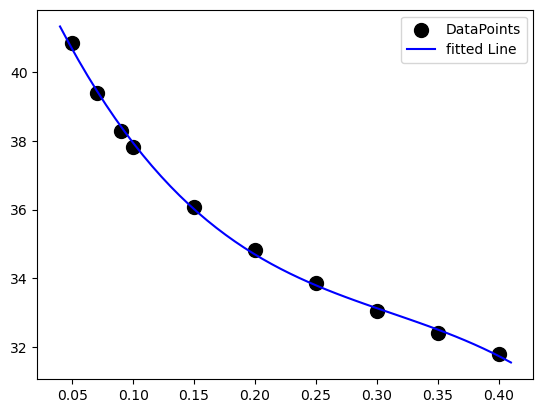

PSNR( 256 ) =
         3         2
-244.3 x + 229.6 x - 84.27 x + 44.38 



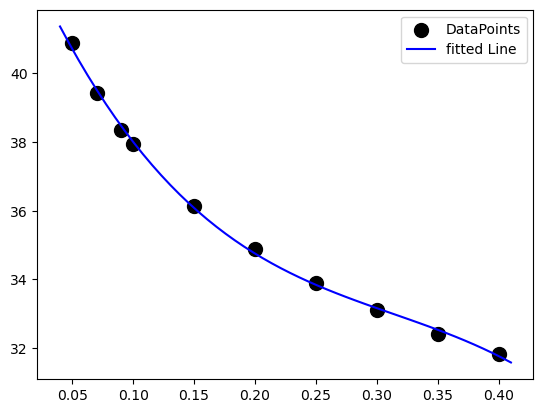

PSNR( 512 ) =
         3         2
-252.1 x + 235.5 x - 85.5 x + 44.48 



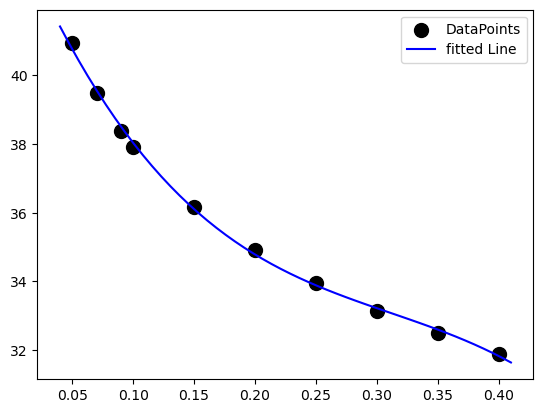

In [25]:
#polyfit function for PSNR
path=r'C:\Users\Biswarup Mistry\Desktop\New_DB\TrainingSet'
D=[0.05,0.07,0.09,0.1,0.15,0.20,0.25,0.30,0.35,0.40]
for item in os.listdir(path):
    x=np.array([])
    y=np.array([])
    k=str(path+'\\'+str(item))
    df=pd.read_csv(k+'\\'+'PSNRvsNoiseDensity.csv')
    x=np.append(x,D)
    y=np.append(y,df['mean'])
    #print(y)
    coeff = np.polyfit(x, y,3) #polyfit function for getting polynomial function got PSNR(y) vs Density(x)
    f=np.poly1d(coeff)
    print('PSNR(',str(item),') =\n',f,'\n')
    xx=np.linspace(0.04,0.41)#,1000)
    yy=f(xx)
    plt.scatter(x,y,c='black',s=100,label='DataPoints')
    plt.plot(xx,yy,c='blue',label='fitted Line')
    plt.legend()
    plt.show()

SSIM( 1024 ) =
         3         2
-20.12 x + 17.83 x - 5.45 x + 0.6771 



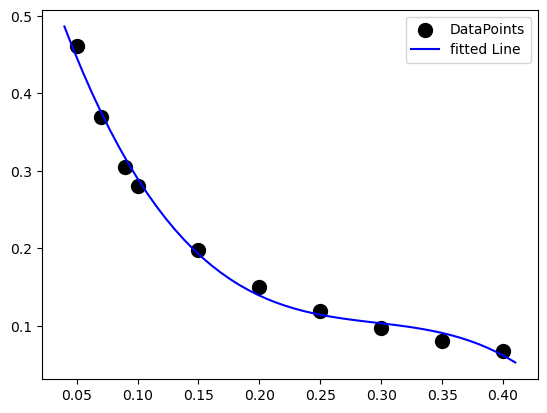

SSIM( 256 ) =
         3         2
-19.14 x + 16.82 x - 5.077 x + 0.6211 



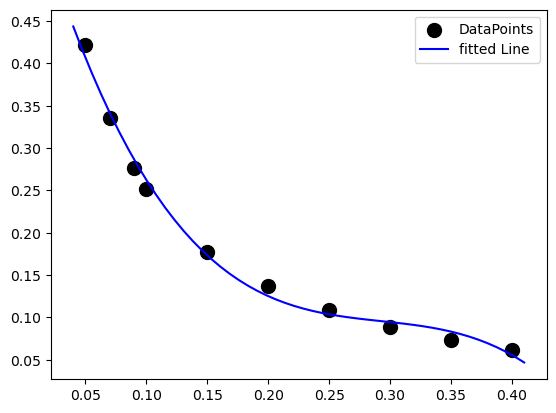

SSIM( 512 ) =
         3         2
-14.04 x + 13.06 x - 4.589 x + 0.8082 



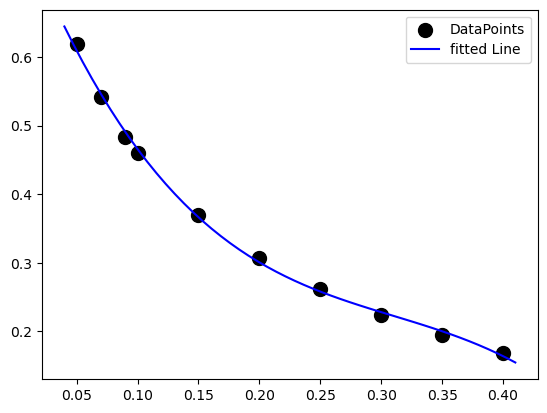

In [24]:
#polyfit function for SSIM
path=r'C:\Users\Biswarup Mistry\Desktop\New_DB\TrainingSet'
D=[0.05,0.07,0.09,0.1,0.15,0.20,0.25,0.30,0.35,0.40]
for item in os.listdir(path):
    x=np.array([])
    y=np.array([])
    k=str(path+'\\'+str(item))
    df=pd.read_csv(k+'\\'+'SSIMvsNoiseDensity.csv')
    x=np.append(x,D)
    y=np.append(y,df['mean'])
    #print(y)
    coeff = np.polyfit(x, y,3) #polyfit function for getting polynomial function got PSNR(y) vs Density(x) of degree Deg=int
    f=np.poly1d(coeff)
    print('SSIM(',str(item),') =\n',f,'\n')
    xx=np.linspace(0.04,0.41)#,1000)
    yy=f(xx)
    plt.scatter(x,y,c='black',s=100,label='DataPoints')
    plt.plot(xx,yy,c='blue',label='fitted Line')
    plt.legend()
    plt.show()